In [12]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [13]:

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units= 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units= 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set

# list all data in history

model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

print(model_history.history.keys())
# summarize history for accuracy


Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.6140 - accuracy: 0.6962 - val_loss: 0.5360 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5092 - accuracy: 0.7962 - val_loss: 0.5045 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4843 - accuracy: 0.7962 - val_loss: 0.4851 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4664 - accuracy: 0.7964 - val_loss: 0.4690 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4530 - accuracy: 0.8013 - val_loss: 0.4575 - val_accuracy: 0.7986
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4442 - accuracy: 0.8065 - val_loss: 0.4495 - val_accuracy: 0.8054
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4379 - accuracy: 0.8119 - val_loss: 0.4436 - val_accuracy: 0.8122

536/536 [==============================] - 0s 916us/step - loss: 0.3837 - accuracy: 0.8276 - val_loss: 0.3956 - val_accuracy: 0.8281
Epoch 58/100
536/536 [==============================] - 0s 919us/step - loss: 0.3830 - accuracy: 0.8263 - val_loss: 0.3950 - val_accuracy: 0.8281
Epoch 59/100
536/536 [==============================] - 1s 945us/step - loss: 0.3823 - accuracy: 0.8276 - val_loss: 0.3945 - val_accuracy: 0.8281
Epoch 60/100
536/536 [==============================] - 1s 998us/step - loss: 0.3816 - accuracy: 0.8278 - val_loss: 0.3937 - val_accuracy: 0.8281
Epoch 61/100
536/536 [==============================] - 1s 980us/step - loss: 0.3810 - accuracy: 0.8272 - val_loss: 0.3931 - val_accuracy: 0.8273
Epoch 62/100
536/536 [==============================] - 1s 997us/step - loss: 0.3801 - accuracy: 0.8289 - val_loss: 0.3925 - val_accuracy: 0.8289
Epoch 63/100
536/536 [==============================] - 1s 988us/step - loss: 0.3793 - accuracy: 0.8285 - val_loss: 0.3919 - val_accuracy

In [14]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


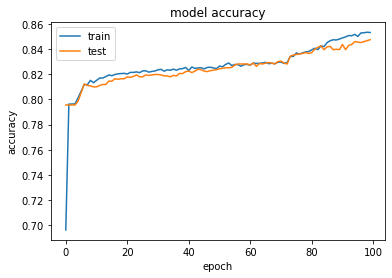

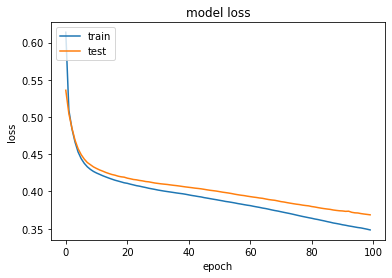

In [15]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [16]:


# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

print(score)



0.854
